In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import PauliEvolutionGate
import numpy as np

# Parameters
n = 10      # number of qubits
J = 1.0     # ZZ interaction strength
h = 0.5     # transverse field strength
t = 1.0     # evolution time

# Build Ising Hamiltonian as SparsePauliOp
pauli_terms = []
coeffs = []

# ZZ terms
for i in range(n - 1):
    label = ['I'] * n
    label[i] = 'Z'
    label[i + 1] = 'Z'
    pauli_terms.append("".join(label))
    coeffs.append(J)

# X terms (transverse field)
for i in range(n):
    label = ['I'] * n
    label[i] = 'X'
    pauli_terms.append("".join(label))
    coeffs.append(h)

# Construct the Hamiltonian
hamiltonian = SparsePauliOp(pauli_terms, coeffs)

# Build evolution circuit
qc = QuantumCircuit(n)
evolution_gate = PauliEvolutionGate(hamiltonian, time=t)
qc.append(evolution_gate, range(n))
qc.measure_all()


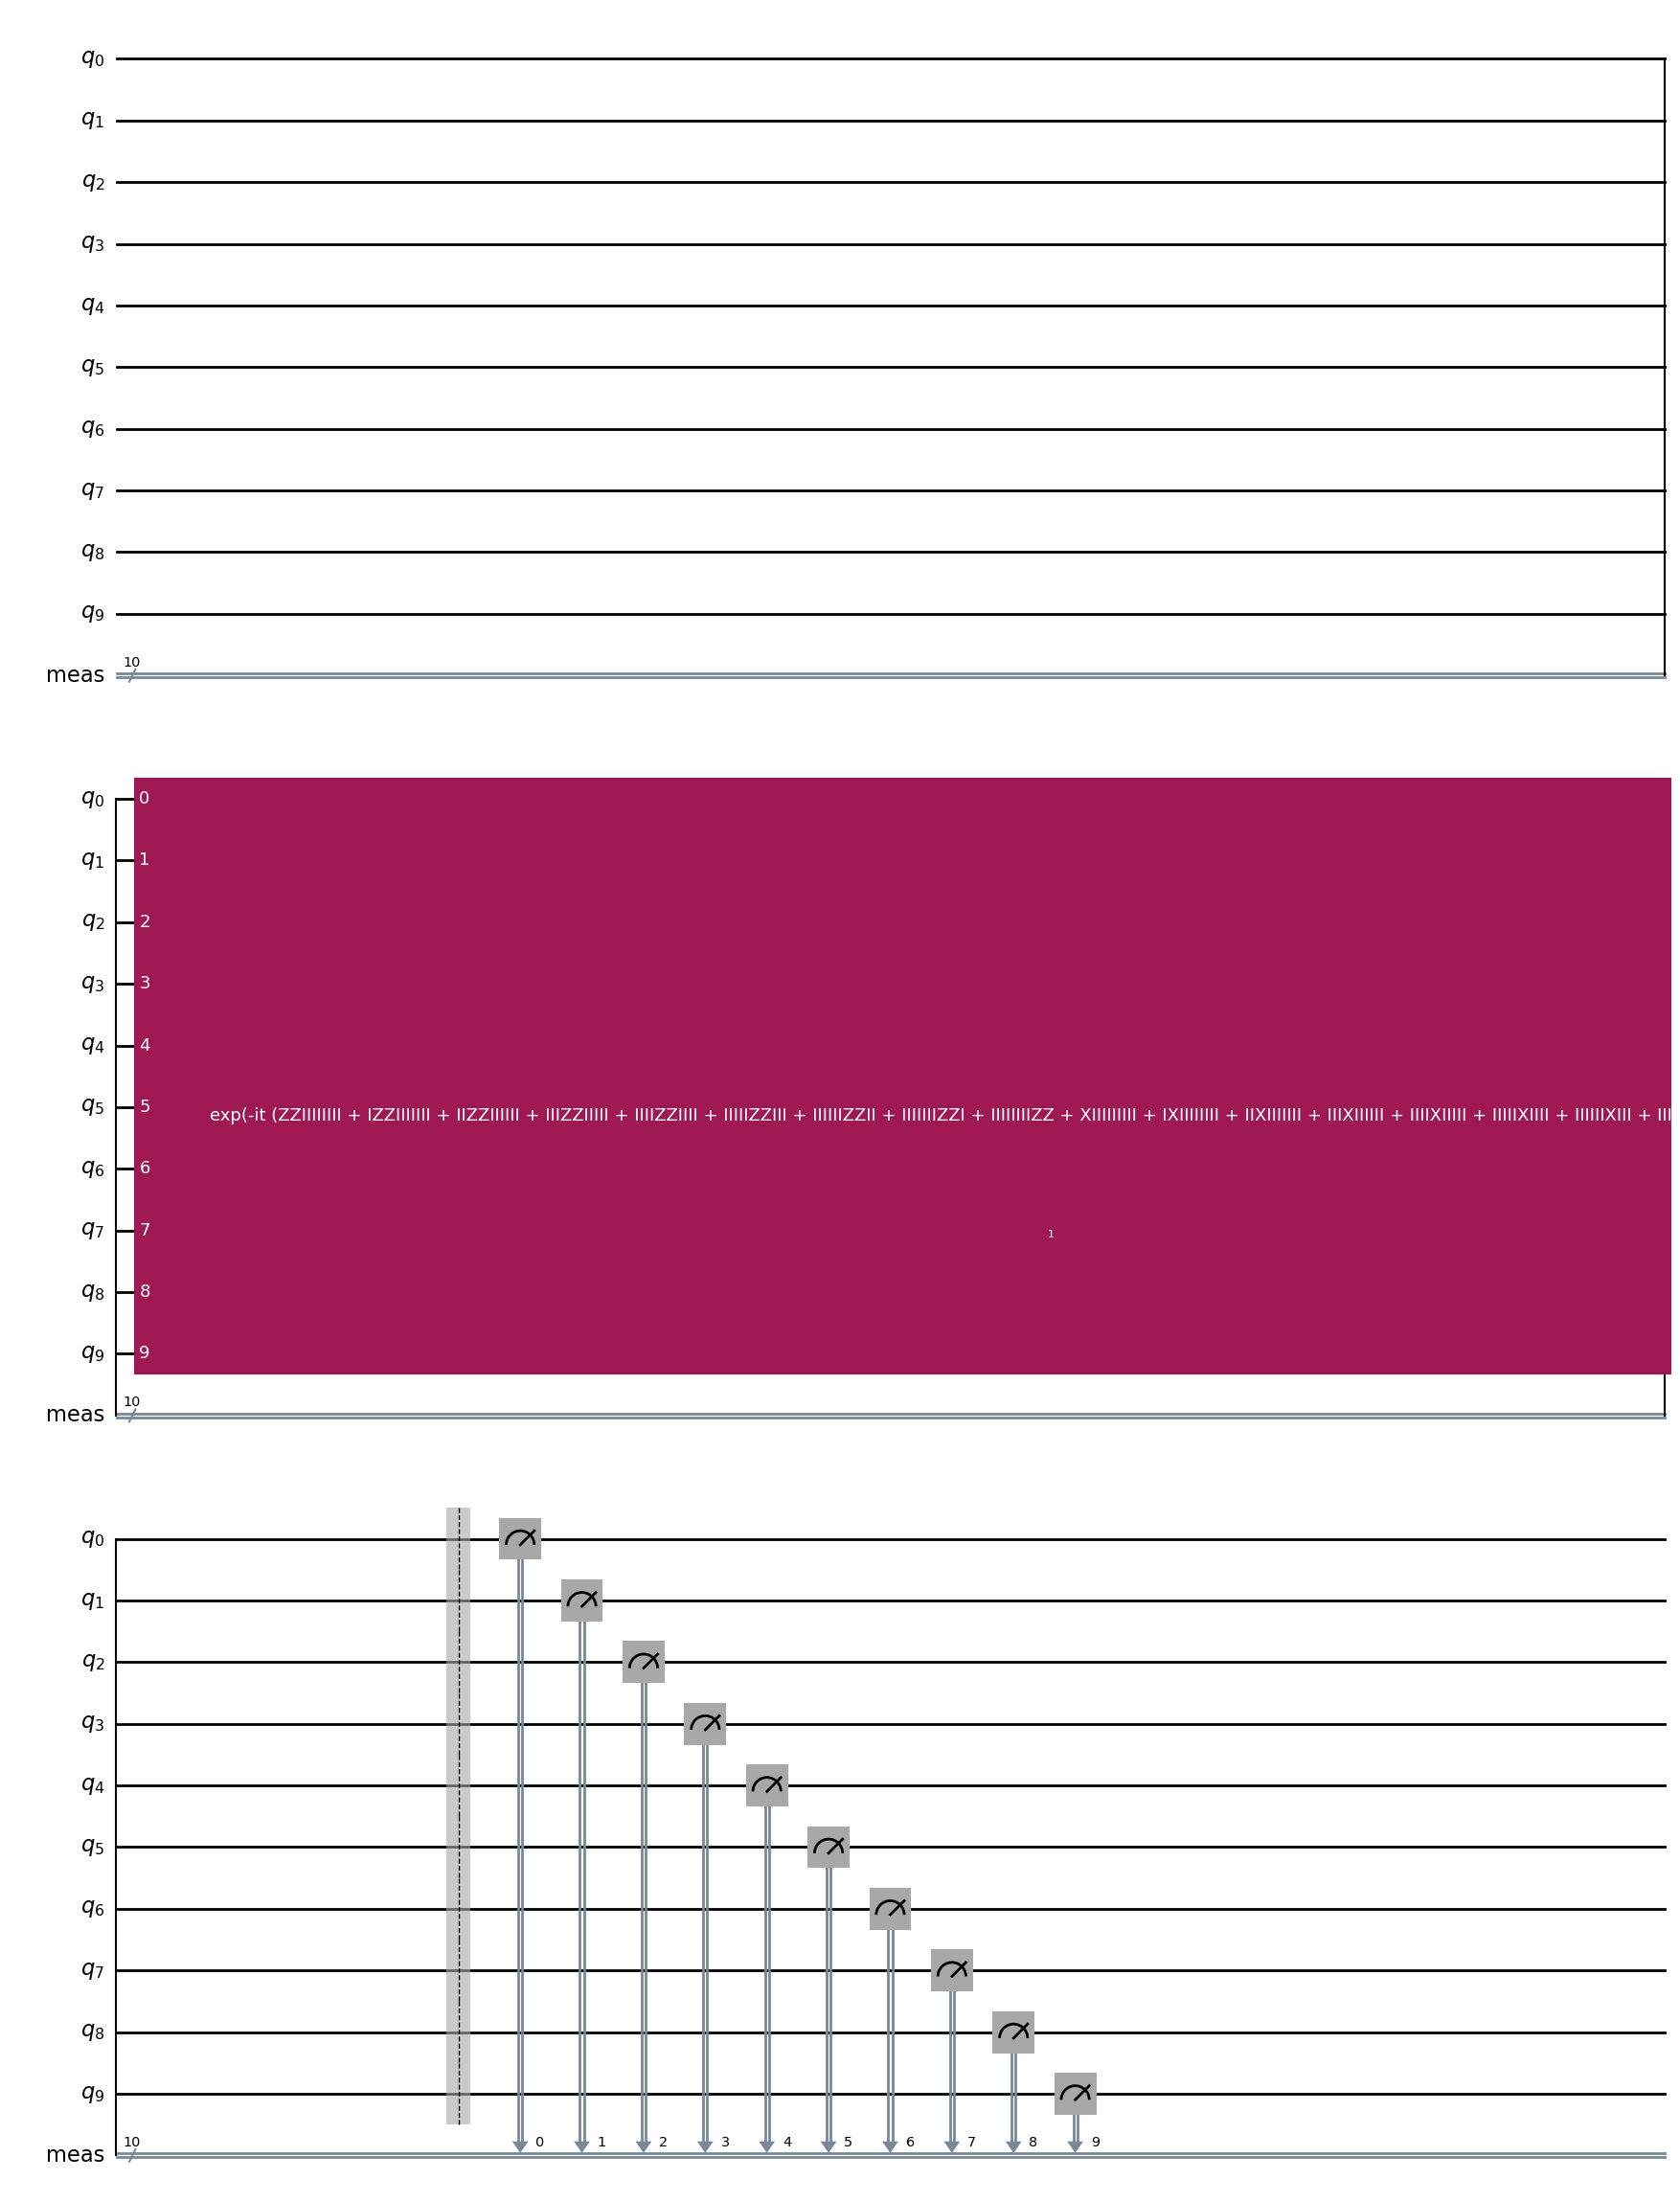

In [3]:
qc.draw('mpl')

In [6]:
from qiskit.quantum_info import Statevector

# Get the statevector of the circuit
sv = Statevector.from_instruction(qc)
print(sv)


Statevector([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


In [12]:
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import QiskitRuntimeService

# backend = FakeSherbrooke()

service = QiskitRuntimeService(channel='ibm_cloud', token="G_1ihMPCjm6ZX8YOKO8fbc6w7Z6HPpXZLX1YMAmCoHxH", instance="00_Hackathon 2025-1-eu")
backend = service.least_busy(simulator=False, operational=True)
print( backend)

<IBMBackend('ibm_aachen')>


In [13]:
from qiskit import transpile
from qiskit_ibm_runtime import Sampler

In [15]:

# Transpile the circuit for the selected backend
transpiled_qc = transpile(qc, backend)

In [ ]:
# Run using the Sampler primitive (preferred Qiskit 2.x way)
sampler = Sampler(backend)
job = sampler.run([transpiled_qc], shots=1024)

# Get the results
result = job.result()

AttributeError: 'PrimitiveResult' object has no attribute 'quasi_dists'

In [20]:
pub_result = result[0]
bit_array = pub_result.data.meas

In [ ]:

test = bit_array.get_bitstrings()

In [28]:
expected_bitstring = '1010010110'
countTrue = 0
countFalse = 0
allTrue = True
for bitstring in test:
    if bitstring == expected_bitstring:
        countTrue += 1
        print(f"Match found: {bitstring}")
    else:
        print(f"No match: {bitstring}")
        countFalse += 1
        allTrue = False

print(f"All tests completed. All match: {allTrue}")
# Check the counts
print(f"Count of matches: {countTrue}")
print(f"Count of non-matches: {countFalse}")

Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
No match: 1010010010
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
No match: 1010010010
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 101001011

In [32]:
countTrue / (countTrue + countFalse) * 100

94.921875

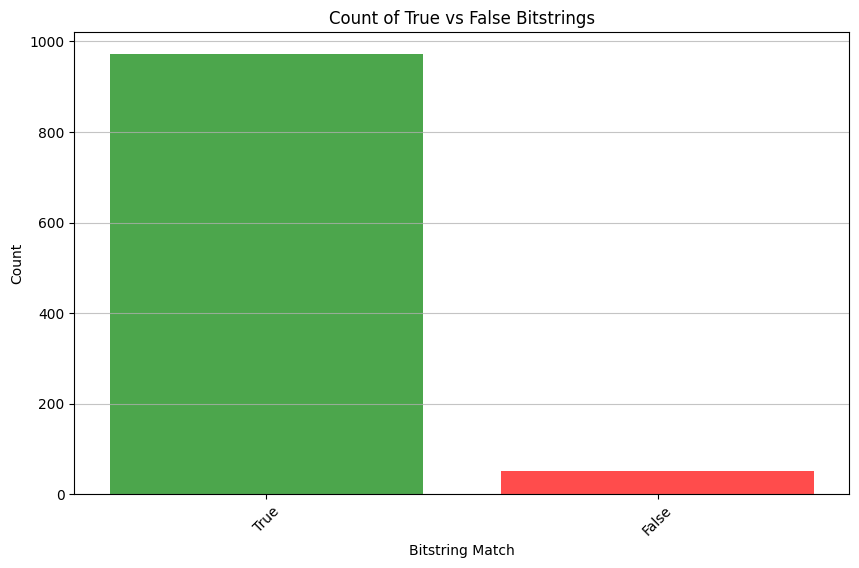

In [30]:
# generate a plot by histogram based on the count result using plt
import matplotlib.pyplot as plt

trueCount = countTrue
falseCount = countFalse
# Create a histogram based on the count result
plt.figure(figsize=(10, 6))
plt.bar(['True', 'False'], [trueCount, falseCount], color=['green', 'red'], alpha=0.7)
plt.title('Count of True vs False Bitstrings')
plt.xlabel('Bitstring Match')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()